# ***Data Prep***

In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.tools import diff
import statsmodels.api as sm 
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
!pip install statsmodels
import statsmodels.api as sm
!pip install pmdarima
import pmdarima
!pip install pyramid
import pyramid as pm
!pip install arch yfinance pmdarima
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from datetime import datetime
from datetime import datetime,timedelta
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
import io, os, sys, setuptools, tokenize
!pip install pystan~=2.14
!pip install fbprophet
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.plot import add_changepoints_to_plot 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('MugDal.csv', index_col = 'Date', parse_dates=True)

In [5]:
df

,Price
Date,
2021-06-01,87.5
2021-06-02,85.0
2021-06-03,85.0
2021-06-04,85.0
2021-06-05,85.0
...,...
2022-11-26,125.0
2022-11-27,125.0
2022-11-28,127.5


In [6]:
df.dropna()

,Price
Date,
2021-06-01,87.5
2021-06-02,85.0
2021-06-03,85.0
2021-06-04,85.0
2021-06-05,85.0
...,...
2022-11-26,125.0
2022-11-27,125.0
2022-11-28,127.5


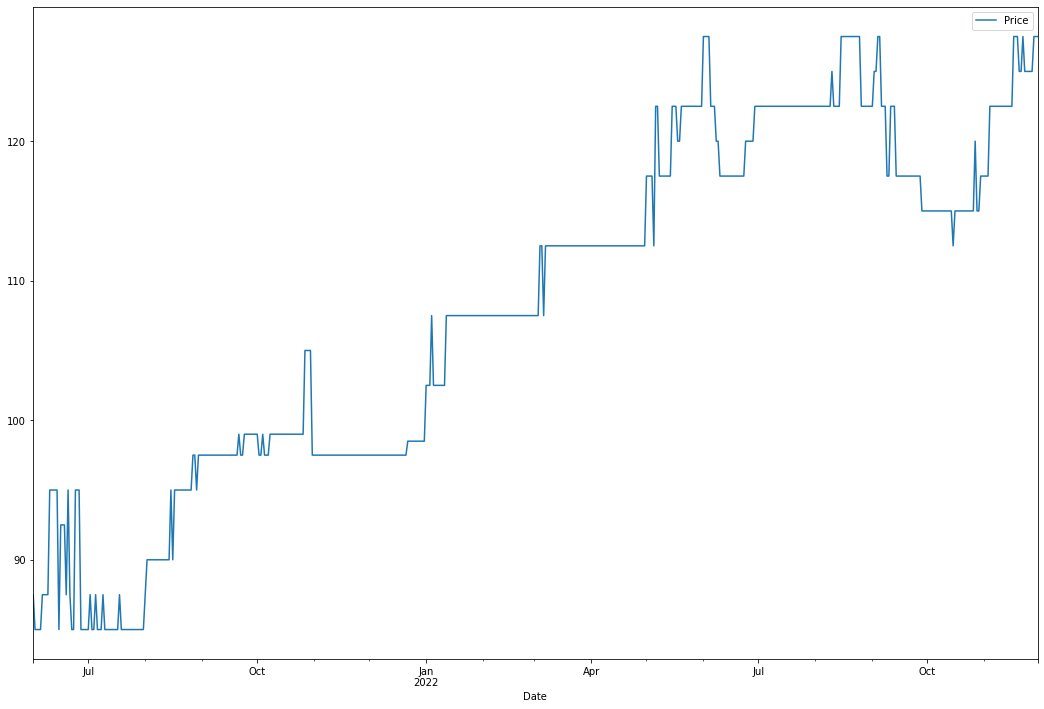

In [7]:
df.plot(figsize = (18, 12));

In [8]:
results = seasonal_decompose(df['Price'], model = 'addtive')

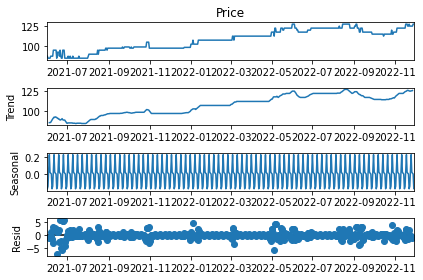

In [9]:
results.plot();

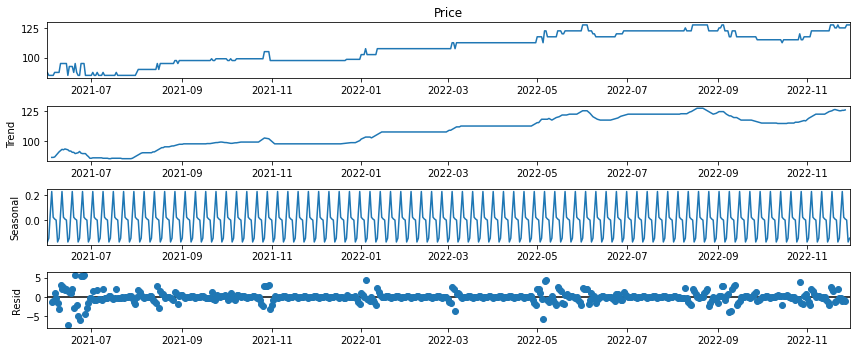

In [10]:
#from pylab import rcParams 
rcParams['figure.figsize'] = 12, 5 

results.plot();

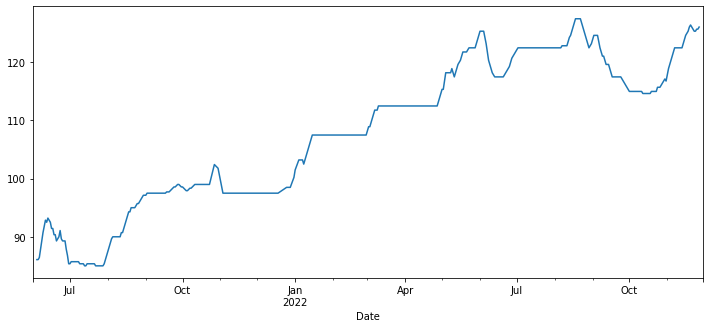

In [11]:
results.trend.plot()

In [12]:
df.index.freq = 'D'

In [13]:
df.head()

,Price
Date,
2021-06-01,87.5
2021-06-02,85.0
2021-06-03,85.0
2021-06-04,85.0
2021-06-05,85.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 548 entries, 2021-06-01 to 2022-11-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   548 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [15]:
train_data = df.iloc[:500]
test_data = df.iloc[499:]

# ***Exponential Smoothing***

In [16]:
fitted_model = ExponentialSmoothing(train_data['Price'], trend = 'add', seasonal = 'add', seasonal_periods=30).fit()

In [17]:
test_predictions = fitted_model.forecast(49)

In [18]:
test_predictions

2022-10-14    114.688086
2022-10-15    114.375647
2022-10-16    114.469433
2022-10-17    115.156937
2022-10-18    115.219473
2022-10-19    115.313317
2022-10-20    114.688350
2022-10-21    114.844634
2022-10-22    115.375872
2022-10-23    115.219623
2022-10-24    115.420014
2022-10-25    115.272963
2022-10-26    114.831756
2022-10-27    114.890520
2022-10-28    115.419890
2022-10-29    115.802238
2022-10-30    116.008122
2022-10-31    116.302310
2022-11-01    115.714071
2022-11-02    116.684676
2022-11-03    116.831740
2022-11-04    116.537616
2022-11-05    116.096416
2022-11-06    116.096452
2022-11-07    115.361226
2022-11-08    116.243614
2022-11-09    115.802360
2022-11-10    116.537693
2022-11-11    116.390690
2022-11-12    116.831902
2022-11-13    116.372425
2022-11-14    116.059986
2022-11-15    116.153772
2022-11-16    116.841276
2022-11-17    116.903812
2022-11-18    116.997656
2022-11-19    116.372689
2022-11-20    116.528973
2022-11-21    117.060211
2022-11-22    116.903962


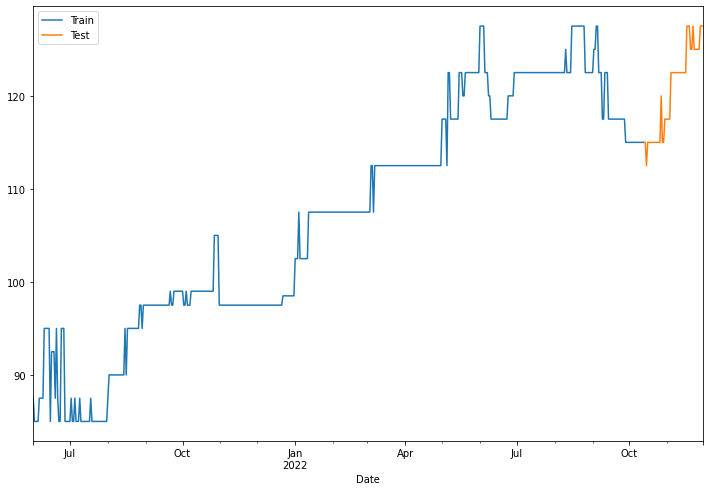

In [19]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Price'].plot(legend=True, label='Test', figsize=(12,8))

In [20]:
test_data.describe()

,Price
count,49.000000
mean,120.510204
std,4.786580
min,112.500000
25%,115.000000
50%,122.500000
75%,125.000000
max,127.500000


In [21]:
mean_absolute_error(test_data,test_predictions)


4.634135637974144

In [22]:
mean_squared_error(test_data, test_predictions)

35.61947439813537

In [23]:
from statsmodels.tools.eval_measures import rmse

In [24]:
rmse(test_data, test_predictions)

array([7.50605344, 7.75090751, 7.67689354, 7.14851344, 7.10180334,
       7.03216961, 7.50584862, 7.38528685, 6.98606734, 7.10169133,
       6.95369011, 7.06204389, 7.39517079, 7.35014439, 6.95378085,
       6.67897592, 6.53548129, 6.33641419, 6.74141427, 6.0892066 ,
       5.99790565, 6.18265562, 6.47497461, 6.47495007, 6.99683883,
       6.37554441, 6.6788896 , 6.18260589, 6.27807072, 5.99780595,
       6.29007092, 6.49986274, 6.43601405, 5.99206204, 5.95397663,
       5.89760689, 6.28989722, 6.18821268, 5.86056509, 5.95388555,
       5.83468873, 5.92172975, 6.19650573, 6.15879154, 5.83476109,
       5.62015073, 5.51211831, 5.36769059, 5.66807157])

In [25]:
np.sqrt(mean_squared_error(test_data, test_predictions))

5.968205291219075

In [26]:
final_model = ExponentialSmoothing(df['Price'], trend = 'add', seasonal = 'add', seasonal_periods = 60).fit()

In [27]:
forecast_predictions = final_model.forecast(60)

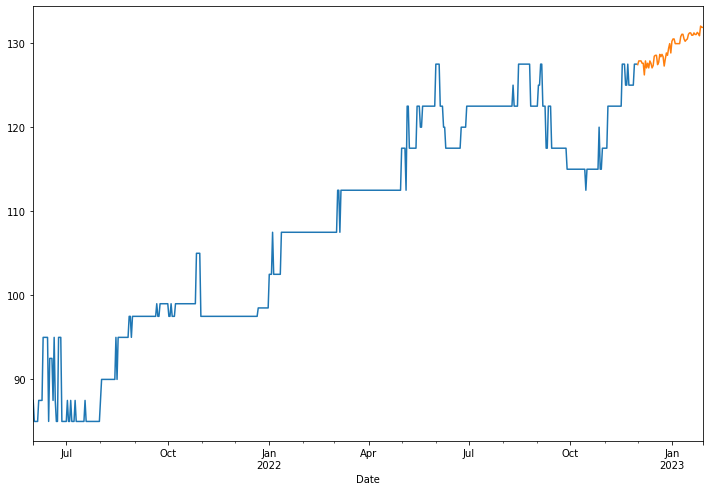

In [28]:
df['Price'].plot(figsize = (12,8))
forecast_predictions.plot(figsize=(12,8))

In [29]:
forecast_predictions

2022-12-01    127.438144
2022-12-02    127.882437
2022-12-03    127.882367
2022-12-04    127.882464
2022-12-05    127.604660
2022-12-06    127.604763
2022-12-07    126.215828
2022-12-08    127.882451
2022-12-09    127.049225
2022-12-10    127.604739
2022-12-11    127.049262
2022-12-12    127.882520
2022-12-13    127.604718
2022-12-14    127.049178
2022-12-15    127.326932
2022-12-16    128.438195
2022-12-17    128.549204
2022-12-18    128.549124
2022-12-19    127.438161
2022-12-20    127.715978
2022-12-21    128.660185
2022-12-22    128.382491
2022-12-23    128.660388
2022-12-24    128.382565
2022-12-25    127.271467
2022-12-26    128.104882
2022-12-27    128.827032
2022-12-28    128.549244
2022-12-29    129.382656
2022-12-30    129.938091
2022-12-31    128.826968
2023-01-01    130.215920
2023-01-02    130.493821
2023-01-03    130.493868
2023-01-04    129.938099
2023-01-05    129.938107
2023-01-06    129.938256
2023-01-07    129.938155
2023-01-08    129.938103
2023-01-09    130.771493


# *SARIMAX*

In [30]:
from datetime import datetime

In [31]:
df_KN = pd.read_csv('MugDal.csv', index_col = 'Date', parse_dates = True)

In [32]:
df_KN.index.freq ='D'

In [33]:
df_KN.index

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10',
               ...
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30'],
              dtype='datetime64[ns]', name='Date', length=548, freq='D')

In [34]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [35]:
adf_test(df_KN['Price'])

ADF Statistics: -0.716408748463675
p- value: 0.8424533984063657
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [36]:
## Use Techniques Differencing
df_KN['Price First Difference']=df_KN['Price']-df_KN['Price'].shift(1)

In [37]:
df_KN.head()

,Price,Price First Difference
Date,,
2021-06-01,87.5,NaN
2021-06-02,85.0,-2.5
2021-06-03,85.0,0.0
2021-06-04,85.0,0.0
2021-06-05,85.0,0.0


In [38]:
adf_test(df_KN['Price'].dropna())

ADF Statistics: -0.716408748463675
p- value: 0.8424533984063657
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [39]:
df_KN['Price Second Difference']=df_KN['Price First Difference']-df_KN['Price First Difference'].shift(1)

In [40]:
adf_test(df_KN['Price Second Difference'].dropna())

ADF Statistics: -10.7640269675097
p- value: 2.478894900251481e-19
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [41]:
### 1 months
## Use Techniques Differencing
df_KN['Price Monthly Difference']=df_KN['Price']-df_KN['Price'].shift(30)

In [42]:
adf_test(df_KN['Price Monthly Difference'].dropna())

ADF Statistics: -4.860833516267196
p- value: 4.154214217588773e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


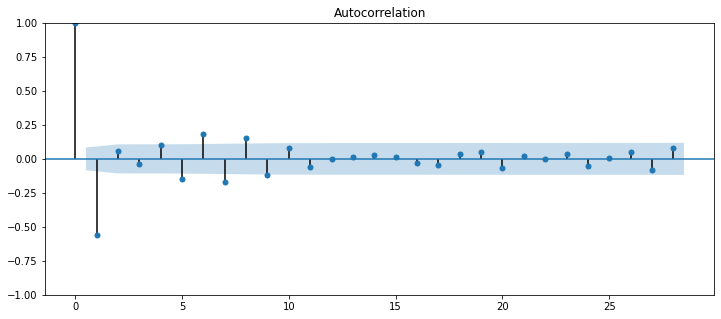

In [43]:
acf = plot_acf(df_KN['Price Second Difference'].dropna())

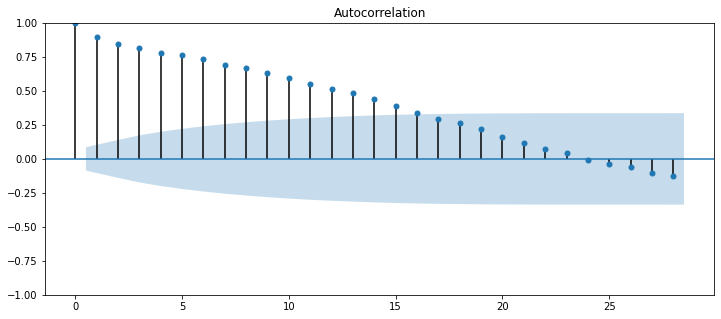

In [44]:
acf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

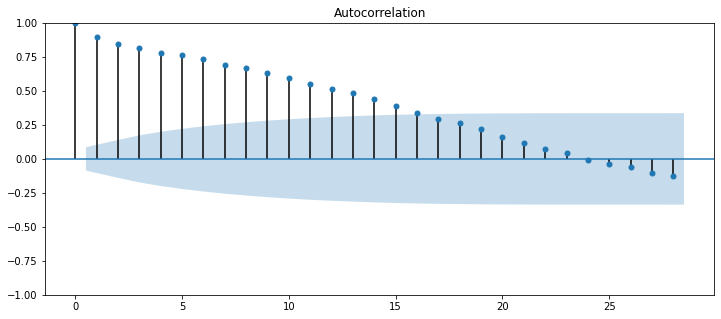

In [45]:
pacf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

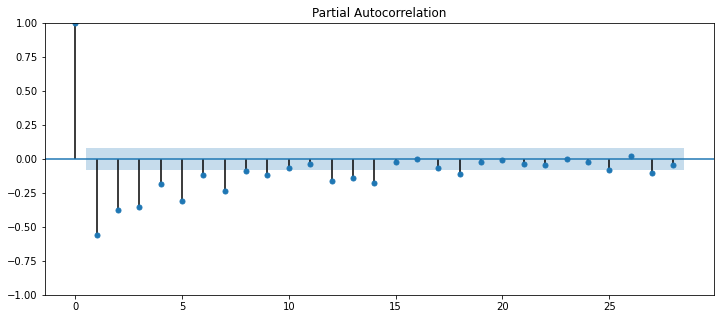

In [46]:
result_KN = plot_pacf(df_KN["Price Second Difference"].dropna())

In [47]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2022,10,1)
test_dataset_end=datetime(2022,11,30)

In [48]:
train_data=df_KN[:train_dataset_end]
test_data=df_KN[train_dataset_end+timedelta(days=1):test_dataset_end]

In [49]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [50]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2022-10-02,115.0,0.0,0.0,-10.0
2022-10-03,115.0,0.0,0.0,-10.0
2022-10-04,115.0,0.0,0.0,-12.5
2022-10-05,115.0,0.0,0.0,-12.5
2022-10-06,115.0,0.0,0.0,-7.5
2022-10-07,115.0,0.0,0.0,-7.5
2022-10-08,115.0,0.0,0.0,-7.5
2022-10-09,115.0,0.0,0.0,-2.5
2022-10-10,115.0,0.0,0.0,-2.5


In [51]:
import statsmodels.api as sm

In [52]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
from pmdarima import ARIMA

In [55]:
train_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2021-06-01,87.5,NaN,NaN,NaN
2021-06-02,85.0,-2.5,NaN,NaN
2021-06-03,85.0,0.0,2.5,NaN
2021-06-04,85.0,0.0,0.0,NaN
2021-06-05,85.0,0.0,0.0,NaN
...,...,...,...,...
2022-09-27,117.5,0.0,0.0,-5.0
2022-09-28,115.0,-2.5,-2.5,-7.5
2022-09-29,115.0,0.0,2.5,-7.5


In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [57]:
model_SARIMAX=SARIMAX(train_data['Price'],order=(3,0,5),seasonal_order=(0,1,0,30))

In [58]:
model_SARIMAX_fit=model_SARIMAX.fit()

In [59]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Price   No. Observations:                  488
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 30)   Log Likelihood                -996.016
Date:                             Fri, 06 Jan 2023   AIC                           2010.031
Time:                                     21:28:04   BIC                           2047.173
Sample:                                 06-01-2021   HQIC                          2024.659
                                      - 10-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7173      0.053    -13.484      0.000      -0.822      -0.613
ar.L2          0.7450      0.030     24.937      0.000       0.686       0.804
ar.L3          0.8312      0.045     18.308      0.000       0.742       0.920
ma.L1          1.4392      0.065     22.253      0.000       1.312       1.566
ma.L2          0.2995      0.092      3.243      0.001       0.118       0.480
ma.L3         -0.4301      0.091     -4.750      0.000      -0.608      -0.253
ma.L4         -0.0805      0.082     -0.976      0.329      -0.242       0.081
ma.L5         -0.0319      0.057     -0.562      0.574      -0.143       0.079
sigma2         4.5415      0.202     22.433      0.000       4.145       4.938
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               809.70
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                            -0.54
Prob(H) (two-sided):                  0.71   Kurtosis:                         9.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2022-10-02 00:00:00
2022-11-30 00:00:00


In [61]:
pred_Sarimax=model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))
residuals=test_data['Price']-pred_Sarimax

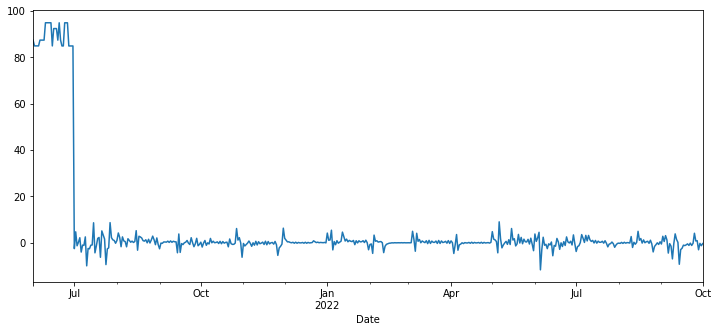

In [62]:
model_SARIMAX_fit.resid.plot()

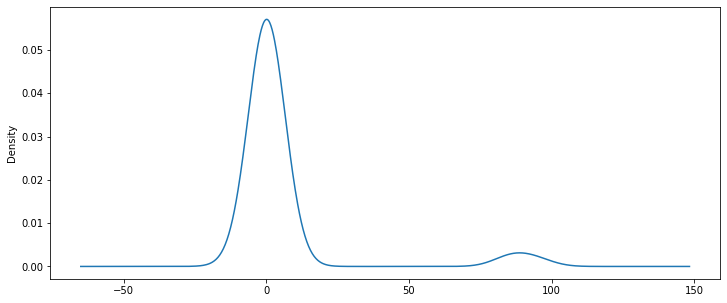

In [63]:
model_SARIMAX_fit.resid.plot(kind='kde')

In [64]:
test_data['Predicted_SARIMAX']=pred_Sarimax

In [65]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference,Predicted_SARIMAX
Date,,,,,
2022-10-02,115.0,0.0,0.0,-10.0,118.001924
2022-10-03,115.0,0.0,0.0,-10.0,118.759038
2022-10-04,115.0,0.0,0.0,-12.5,120.790311
2022-10-05,115.0,0.0,0.0,-12.5,121.915458
2022-10-06,115.0,0.0,0.0,-7.5,116.330906
2022-10-07,115.0,0.0,0.0,-7.5,117.187650
2022-10-08,115.0,0.0,0.0,-7.5,117.072841
2022-10-09,115.0,0.0,0.0,-2.5,112.307588
2022-10-10,115.0,0.0,0.0,-2.5,112.765775


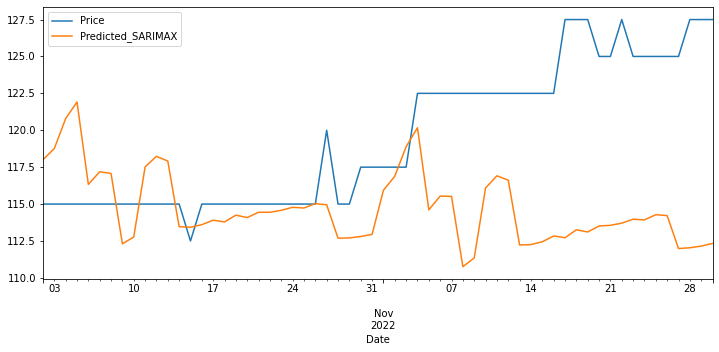

In [66]:
test_data[['Price','Predicted_SARIMAX']].plot()

In [67]:
pred_Sarimax

2022-10-02    118.001924
2022-10-03    118.759038
2022-10-04    120.790311
2022-10-05    121.915458
2022-10-06    116.330906
2022-10-07    117.187650
2022-10-08    117.072841
2022-10-09    112.307588
2022-10-10    112.765775
2022-10-11    117.516592
2022-10-12    118.231774
2022-10-13    117.913992
2022-10-14    113.467609
2022-10-15    113.428213
2022-10-16    113.604776
2022-10-17    113.908929
2022-10-18    113.789562
2022-10-19    114.248520
2022-10-20    114.083202
2022-10-21    114.444479
2022-10-22    114.443659
2022-10-23    114.575985
2022-10-24    114.780741
2022-10-25    114.731776
2022-10-26    115.029420
2022-10-27    114.949639
2022-10-28    112.687904
2022-10-29    112.704960
2022-10-30    112.803917
2022-10-31    112.943683
2022-11-01    115.933257
2022-11-02    116.885601
2022-11-03    118.883809
2022-11-04    120.167850
2022-11-05    114.606965
2022-11-06    115.537623
2022-11-07    115.519496
2022-11-08    110.759633
2022-11-09    111.347415
2022-11-10    116.089652


In [68]:
predicted_value_SARIMA = pred_Sarimax

In [69]:
predicted_value_SARIMA = model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))

In [70]:
mean_absolute_error(test_data['Price'], test_data['Predicted_SARIMAX'])

5.9818185268822734

In [71]:
mean_squared_error(test_data['Price'], test_data['Predicted_SARIMAX'])

60.27905590461498

In [72]:
rmse(test_data['Predicted_SARIMAX'], test_data['Price'])

7.763958777879683

# ***FB Prophet***

In [73]:
df_fb  = pd.read_csv('MugDal.csv')

In [74]:
df_fb.columns = ['ds', 'y']

In [75]:
df_fb['ds'] =pd.to_datetime(df_fb['ds'])

In [76]:
df_fb.head()

,ds,y
0,2021-06-01,87.5
1,2021-06-02,85.0
2,2021-06-03,85.0
3,2021-06-04,85.0
4,2021-06-05,85.0


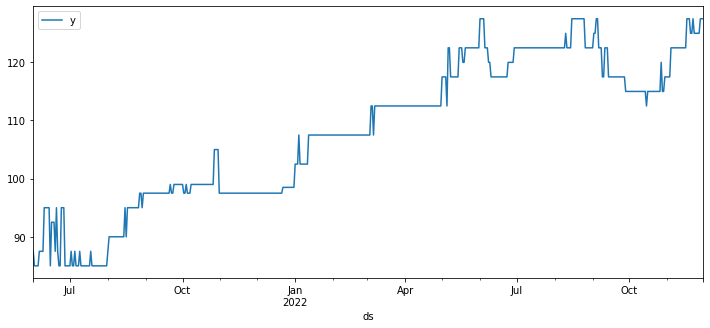

In [77]:
df_fb.plot(x='ds', y='y')

In [78]:
len(df_fb)

548

In [79]:
train_fb = df_fb.iloc[:488]
test_fb = df_fb.iloc[488:]

In [80]:
import prophet

In [81]:
import io, os, sys, setuptools, tokenize

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
from fbprophet import Prophet

In [83]:
m = Prophet()
m.fit(train_fb)
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [84]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
543,2022-11-26,120.326549,116.117808,124.939826,117.591067,123.659525,0.013068,0.013068,0.013068,0.013068,0.013068,0.013068,0.0,0.0,0.0,120.339617
544,2022-11-27,120.313732,116.344482,125.173091,117.479582,123.760838,0.074964,0.074964,0.074964,0.074964,0.074964,0.074964,0.0,0.0,0.0,120.388697
545,2022-11-28,120.300916,115.870139,125.347498,117.377559,123.875617,0.065838,0.065838,0.065838,0.065838,0.065838,0.065838,0.0,0.0,0.0,120.366753
546,2022-11-29,120.288099,115.708184,125.105807,117.269220,123.983671,-0.170205,-0.170205,-0.170205,-0.170205,-0.170205,-0.170205,0.0,0.0,0.0,120.117894
547,2022-11-30,120.275282,115.633893,125.404714,117.161166,124.088610,-0.122518,-0.122518,-0.122518,-0.122518,-0.122518,-0.122518,0.0,0.0,0.0,120.152765


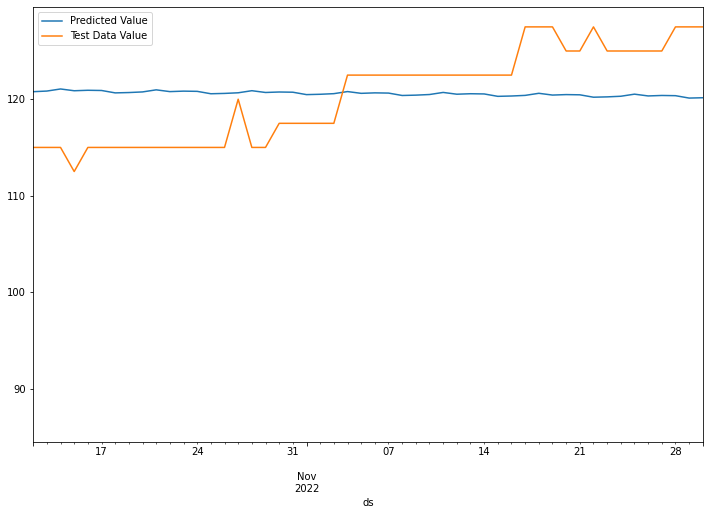

In [85]:
ax = forecast.plot(x='ds', y = 'yhat', label = 'Predicted Value', legend = True, figsize = (12, 8))
test_fb.plot(x='ds', y = 'y', label = 'Test Data Value', legend = True, ax = ax, xlim=('2022-10-12','2022-11-30'))

In [86]:
from statsmodels.tools.eval_measures import rmse

In [87]:
predictions_fb = forecast.iloc[-60:]['yhat']

In [88]:
predictions_fb

488    121.106434
489    121.084491
490    120.835631
491    120.870502
492    120.935040
493    121.151401
494    120.967638
495    121.016717
496    120.994774
497    120.745914
498    120.780785
499    120.845323
500    121.061684
501    120.877920
502    120.927000
503    120.905056
504    120.656197
505    120.691068
506    120.755606
507    120.971967
508    120.788203
509    120.837283
510    120.815339
511    120.566480
512    120.601350
513    120.665889
514    120.882250
515    120.698486
516    120.747566
517    120.725622
518    120.476763
519    120.511633
520    120.576171
521    120.792533
522    120.608769
523    120.657849
524    120.635905
525    120.387045
526    120.421916
527    120.486454
528    120.702816
529    120.519052
530    120.568131
531    120.546188
532    120.297328
533    120.332199
534    120.396737
535    120.613098
536    120.429335
537    120.478414
538    120.456471
539    120.207611
540    120.242482
541    120.307020
542    120.523381
543    120

In [89]:
test_fb

,ds,y
488,2022-10-02,115.0
489,2022-10-03,115.0
490,2022-10-04,115.0
491,2022-10-05,115.0
492,2022-10-06,115.0
493,2022-10-07,115.0
494,2022-10-08,115.0
495,2022-10-09,115.0
496,2022-10-10,115.0
497,2022-10-11,115.0


In [90]:
mean_absolute_error(test_fb['y'], predictions_fb)

4.7516287511535165

In [91]:
mean_squared_error(test_fb['y'], predictions_fb)

26.226804568226587

In [92]:
rmse(predictions_fb, test_fb['y'])

5.121211240344084

In [93]:
test_fb.mean()

y    119.5
dtype: float64

In [94]:
from fbprophet.diagnostics import cross_validation, performance_metrics

In [95]:
#Intial Training period 
initial = 400
initial = str(initial) +' days'
initial 
#Period Length for we are going to run cross validation for 
period = 400
period = str(period) +' days'

#Horizon of prediction for each fold 
horizon = 60
horizon = str(horizon) + ' days'

In [96]:
dfb_cv = cross_validation(m, initial = initial, period=period, horizon = horizon)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2022-08-02 00:00:00 and 2022-08-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [97]:
dfb_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-08-03,123.529441,120.567798,126.576625,122.5,2022-08-02
1,2022-08-04,123.722059,120.971722,126.575352,122.5,2022-08-02
2,2022-08-05,124.165445,121.137069,127.129756,122.5,2022-08-02
3,2022-08-06,124.026984,121.012265,126.941345,122.5,2022-08-02
4,2022-08-07,123.933415,121.004125,126.868569,122.5,2022-08-02


In [98]:
performance_metrics(dfb_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,1.948681,1.395952,1.380676,0.011271,0.011592,1.000000
1,7 days,2.044619,1.429902,1.422239,0.011610,0.011592,1.000000
2,8 days,1.965257,1.401876,1.386661,0.011292,0.011592,1.000000
3,9 days,1.975630,1.405571,1.389758,0.011318,0.011592,1.000000
4,10 days,2.341332,1.530141,1.489830,0.012134,0.011592,1.000000
5,11 days,2.658208,1.630401,1.582419,0.012890,0.012615,1.000000
6,12 days,2.927147,1.710891,1.663864,0.013555,0.014610,1.000000
7,13 days,4.288774,2.070936,1.972614,0.015908,0.015854,0.833333
8,14 days,5.889644,2.426859,2.347718,0.018824,0.016801,0.666667
9,15 days,6.963969,2.638933,2.574817,0.020515,0.020631,0.500000


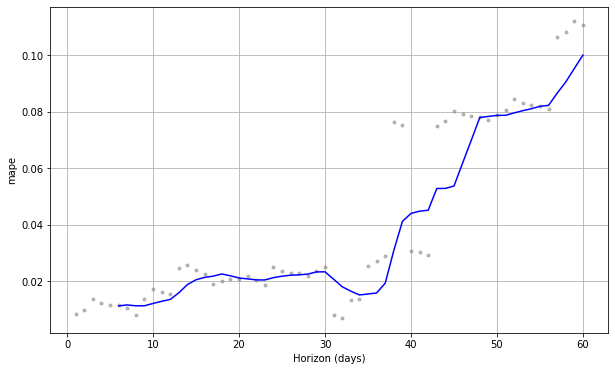

In [99]:
plot_cross_validation_metric(dfb_cv, metric = 'mape');

# **TREND FB**

In [100]:
df_t = pd.read_csv('MugDal.csv')

In [101]:
df_t.columns = ['ds', 'y']

In [102]:
df_t['ds'] = pd.to_datetime(df_t['ds'])

In [103]:
t = Prophet(yearly_seasonality=True, daily_seasonality=True)

In [104]:
t.fit(df_t)

In [105]:
future_t = t.make_future_dataframe(periods=12)
forecast_t = t.predict(future)

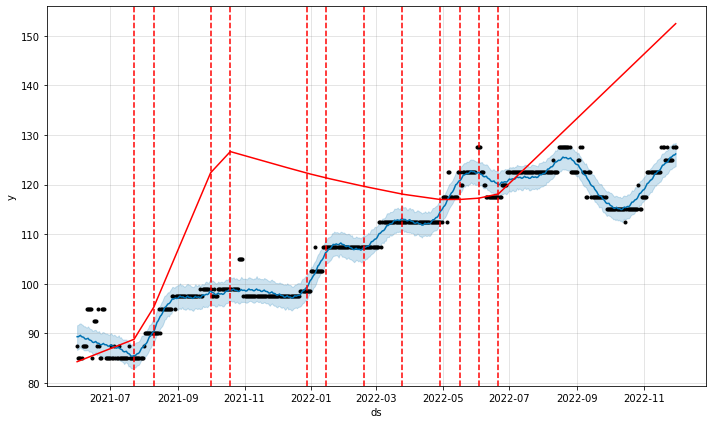

In [106]:
from fbprophet.plot import add_changepoints_to_plot
fig = t.plot(forecast_t)
a = add_changepoints_to_plot(fig.gca(), t, forecast_t)

In [107]:
df_S = pd.read_csv('MugDal.csv')

In [108]:
df_S.columns = ['ds', 'y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


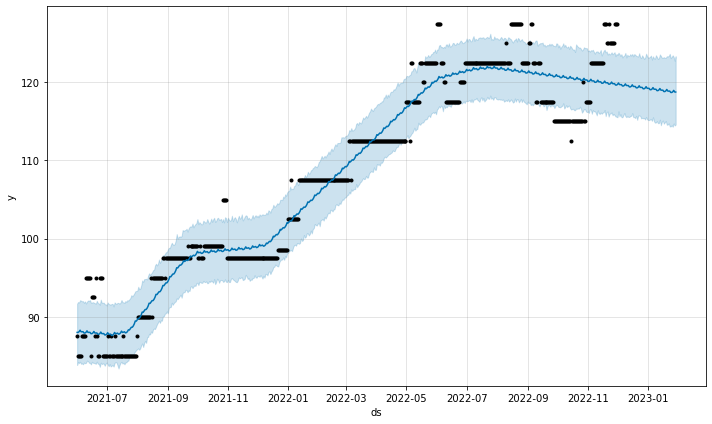

In [109]:
S = Prophet()
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

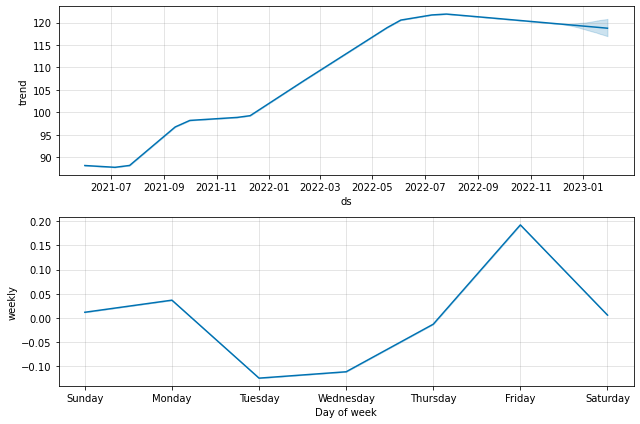

In [110]:
figure = S.plot_components(forecast);

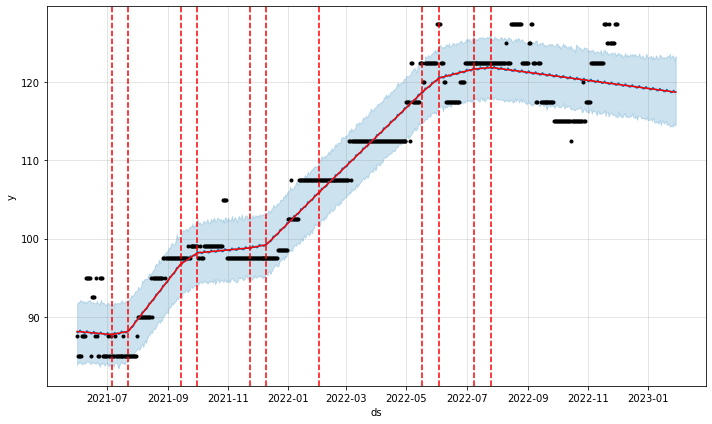

In [111]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


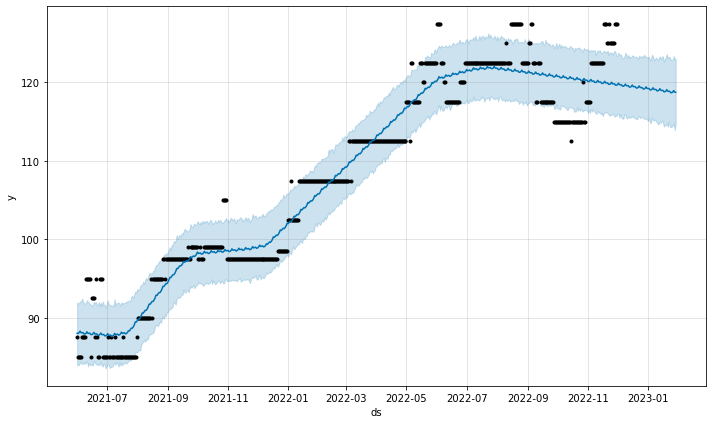

In [112]:
S = Prophet(seasonality_mode='additive')
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

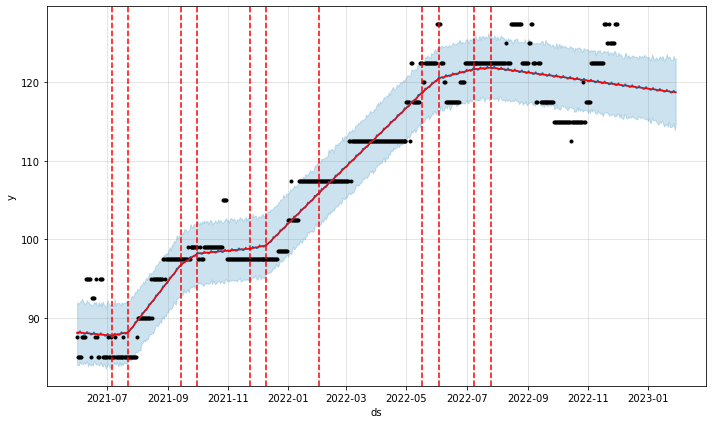

In [113]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

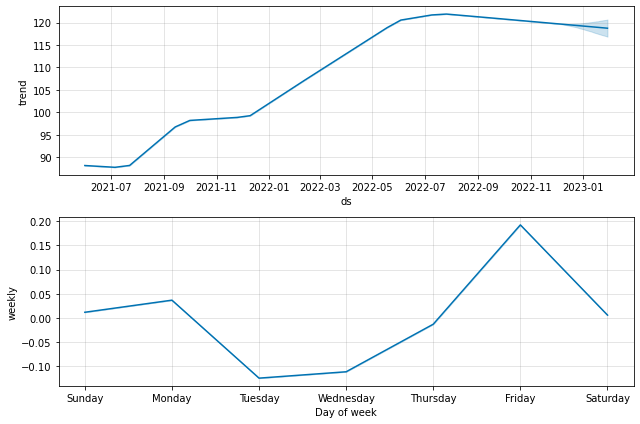

In [114]:
figure = S.plot_components(forecast)

# ***LSTM***

In [115]:
df_LSTM=pd.read_csv("MugDal.csv",parse_dates=["Date"],index_col=[0])

In [116]:
print(df_LSTM.index.freq)

None


In [117]:
test_split=round(len(df_LSTM)*0.20)

In [118]:
df_for_training=df[:-110]
df_for_testing=df[-110:]

In [119]:
print(df_for_training.shape)
print(df_for_testing.shape)

(438, 1)
(110, 1)


In [120]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [121]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [122]:
df_for_training_scaled

array([[0.05882353],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.05882353],
       [0.05882353],
       [0.05882353],
       [0.05882353],
       [0.23529412],
       [0.23529412],
       [0.23529412],
       [0.23529412],
       [0.23529412],
       [0.        ],
       [0.17647059],
       [0.17647059],
       [0.17647059],
       [0.05882353],
       [0.23529412],
       [0.05882353],
       [0.        ],
       [0.        ],
       [0.23529412],
       [0.23529412],
       [0.23529412],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.05882353],
       [0.        ],
       [0.        ],
       [0.05882353],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.05882353],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.058

In [123]:
df_for_training_scaled.shape

(438, 1)

In [124]:
df_for_testing_scaled.shape

(110, 1)

In [125]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

In [126]:
trainX,trainY=createXY(df_for_training_scaled,30)

In [127]:
trainX.shape

(408, 30, 1)

In [128]:
testX,testY=createXY(df_for_testing_scaled,30)

In [129]:
trainX[0]

array([[0.05882353],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.05882353],
       [0.05882353],
       [0.05882353],
       [0.05882353],
       [0.23529412],
       [0.23529412],
       [0.23529412],
       [0.23529412],
       [0.23529412],
       [0.        ],
       [0.17647059],
       [0.17647059],
       [0.17647059],
       [0.05882353],
       [0.23529412],
       [0.05882353],
       [0.        ],
       [0.        ],
       [0.23529412],
       [0.23529412],
       [0.23529412],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [130]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (408, 30, 1)
trainY Shape--  (408,)


In [131]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (80, 30, 1)
testY Shape--  (80,)


In [132]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.05882353]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.05882353]
 [0.05882353]
 [0.05882353]
 [0.05882353]
 [0.23529412]
 [0.23529412]
 [0.23529412]
 [0.23529412]
 [0.23529412]
 [0.        ]
 [0.17647059]
 [0.17647059]
 [0.17647059]
 [0.05882353]
 [0.23529412]
 [0.05882353]
 [0.        ]
 [0.        ]
 [0.23529412]
 [0.23529412]
 [0.23529412]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]

trainY[0]--  0.0


In [133]:
trainY[0]

0.0

In [134]:
trainY.shape

(408,)

In [135]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model
#Grid Search
grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,24,32],
              'epochs' : [32,64],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

In [136]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/32
13/13 [==============================] - 6s 113ms/step - loss: 0.1873 - val_loss: 0.0485
Epoch 2/32
13/13 [==============================] - 0s 31ms/step - loss: 0.0237 - val_loss: 0.0190
Epoch 3/32
13/13 [==============================] - 0s 34ms/step - loss: 0.0130 - val_loss: 0.0049
Epoch 4/32
13/13 [==============================] - 0s 33ms/step - loss: 0.0082 - val_loss: 0.0061
Epoch 5/32
13/13 [==============================] - 0s 32ms/step - loss: 0.0073 - val_loss: 0.0044
Epoch 6/32
13/13 [==============================] - 0s 33ms/step - loss: 0.0073 - val_loss: 0.0044
Epoch 7/32
13/13 [==============================] - 0s 31ms/step - loss: 0.0072 - val_loss: 0.0043
Epoch 8/32
13/13 [==============================] - 0s 31ms/step - loss: 0.0077 - val_loss: 0.0043
Epoch 9/32
13/13 [==============================] - 0s 32ms/step - loss: 0.0065 - val_loss: 0.0041
Epoch 10/32
13/13 [==============================] - 0s 34ms/step - loss: 0.0063 - val_loss: 0.0039
Epoch 11

In [137]:
grid_search.best_params_

{'batch_size': 16, 'epochs': 64, 'optimizer': 'adam'}

In [138]:
my_model=grid_search.best_estimator_.model

In [139]:
my_model

In [140]:
prediction=my_model.predict(testX)

3/3 [==============================] - 1s 11ms/step


In [141]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.79988575]
 [0.81057584]
 [0.82382005]
 [0.8077726 ]
 [0.78748816]
 [0.76995194]
 [0.75724155]
 [0.74919975]
 [0.7448294 ]
 [0.7429803 ]
 [0.7426516 ]
 [0.743091  ]
 [0.74379486]
 [0.7444644 ]
 [0.7450076 ]
 [0.7453117 ]
 [0.7453891 ]
 [0.73199934]
 [0.71747977]
 [0.7054283 ]
 [0.6967998 ]
 [0.69130504]
 [0.68827   ]
 [0.6868973 ]
 [0.6865628 ]
 [0.6868325 ]
 [0.6873053 ]
 [0.68778276]
 [0.68822217]
 [0.6885148 ]
 [0.6886038 ]
 [0.6885792 ]
 [0.6884666 ]
 [0.6883541 ]
 [0.67527914]
 [0.67378247]
 [0.6759518 ]
 [0.6791813 ]
 [0.68220913]
 [0.68455046]
 [0.6861286 ]
 [0.68705183]
 [0.6874876 ]
 [0.6875999 ]
 [0.6875221 ]
 [0.68735147]
 [0.7134898 ]
 [0.71565664]
 [0.7105282 ]
 [0.7166294 ]
 [0.7244875 ]
 [0.7313365 ]
 [0.7362825 ]
 [0.7393573 ]
 [0.76803964]
 [0.7978955 ]
 [0.8215836 ]
 [0.83743376]
 [0.846447  ]
 [0.85050124]
 [0.85144365]
 [0.8507314 ]
 [0.8493649 ]
 [0.84795   ]
 [0.8468276 ]
 [0.84605426]
 [0.8456669 ]
 [0.87401724]
 [0.9037715 ]
 [0.92726   ]
 [0.9282

In [142]:
scaler.inverse_transform(prediction)

array([[118.99515 ],
       [119.44948 ],
       [120.01235 ],
       [119.33034 ],
       [118.46825 ],
       [117.72295 ],
       [117.18276 ],
       [116.840996],
       [116.65525 ],
       [116.57666 ],
       [116.56269 ],
       [116.581375],
       [116.61128 ],
       [116.63974 ],
       [116.66282 ],
       [116.67575 ],
       [116.67903 ],
       [116.10998 ],
       [115.49289 ],
       [114.980705],
       [114.61399 ],
       [114.38047 ],
       [114.25148 ],
       [114.19313 ],
       [114.17892 ],
       [114.19038 ],
       [114.21047 ],
       [114.23077 ],
       [114.24944 ],
       [114.26187 ],
       [114.26566 ],
       [114.26461 ],
       [114.25983 ],
       [114.25504 ],
       [113.69936 ],
       [113.63575 ],
       [113.72795 ],
       [113.865204],
       [113.99388 ],
       [114.0934  ],
       [114.16047 ],
       [114.1997  ],
       [114.21822 ],
       [114.22299 ],
       [114.219696],
       [114.21244 ],
       [115.32332 ],
       [115.4

In [143]:
prediction_copies_array = np.repeat(prediction,1, axis=-1)

In [144]:
prediction_copies_array.shape

(80, 1)

In [145]:
prediction_copies_array

array([[0.79988575],
       [0.81057584],
       [0.82382005],
       [0.8077726 ],
       [0.78748816],
       [0.76995194],
       [0.75724155],
       [0.74919975],
       [0.7448294 ],
       [0.7429803 ],
       [0.7426516 ],
       [0.743091  ],
       [0.74379486],
       [0.7444644 ],
       [0.7450076 ],
       [0.7453117 ],
       [0.7453891 ],
       [0.73199934],
       [0.71747977],
       [0.7054283 ],
       [0.6967998 ],
       [0.69130504],
       [0.68827   ],
       [0.6868973 ],
       [0.6865628 ],
       [0.6868325 ],
       [0.6873053 ],
       [0.68778276],
       [0.68822217],
       [0.6885148 ],
       [0.6886038 ],
       [0.6885792 ],
       [0.6884666 ],
       [0.6883541 ],
       [0.67527914],
       [0.67378247],
       [0.6759518 ],
       [0.6791813 ],
       [0.68220913],
       [0.68455046],
       [0.6861286 ],
       [0.68705183],
       [0.6874876 ],
       [0.6875999 ],
       [0.6875221 ],
       [0.68735147],
       [0.7134898 ],
       [0.715

In [146]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),1)))[:,0]

In [147]:
pred

array([118.99515 , 119.44948 , 120.01235 , 119.33034 , 118.46825 ,
       117.72295 , 117.18276 , 116.840996, 116.65525 , 116.57666 ,
       116.56269 , 116.581375, 116.61128 , 116.63974 , 116.66282 ,
       116.67575 , 116.67903 , 116.10998 , 115.49289 , 114.980705,
       114.61399 , 114.38047 , 114.25148 , 114.19313 , 114.17892 ,
       114.19038 , 114.21047 , 114.23077 , 114.24944 , 114.26187 ,
       114.26566 , 114.26461 , 114.25983 , 114.25504 , 113.69936 ,
       113.63575 , 113.72795 , 113.865204, 113.99388 , 114.0934  ,
       114.16047 , 114.1997  , 114.21822 , 114.22299 , 114.219696,
       114.21244 , 115.32332 , 115.41541 , 115.19745 , 115.45676 ,
       115.79072 , 116.0818  , 116.29201 , 116.42268 , 117.641685,
       118.91055 , 119.91731 , 120.590935, 120.974   , 121.14631 ,
       121.18636 , 121.15608 , 121.098   , 121.03787 , 120.990166,
       120.957306, 120.94084 , 122.14573 , 123.410286, 124.40855 ,
       124.45052 , 124.20111 , 124.50933 , 124.24759 , 123.912

In [148]:
original_copies_array = np.repeat(testY,1, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),1)))[:,0]

In [149]:
pred

array([118.99515 , 119.44948 , 120.01235 , 119.33034 , 118.46825 ,
       117.72295 , 117.18276 , 116.840996, 116.65525 , 116.57666 ,
       116.56269 , 116.581375, 116.61128 , 116.63974 , 116.66282 ,
       116.67575 , 116.67903 , 116.10998 , 115.49289 , 114.980705,
       114.61399 , 114.38047 , 114.25148 , 114.19313 , 114.17892 ,
       114.19038 , 114.21047 , 114.23077 , 114.24944 , 114.26187 ,
       114.26566 , 114.26461 , 114.25983 , 114.25504 , 113.69936 ,
       113.63575 , 113.72795 , 113.865204, 113.99388 , 114.0934  ,
       114.16047 , 114.1997  , 114.21822 , 114.22299 , 114.219696,
       114.21244 , 115.32332 , 115.41541 , 115.19745 , 115.45676 ,
       115.79072 , 116.0818  , 116.29201 , 116.42268 , 117.641685,
       118.91055 , 119.91731 , 120.590935, 120.974   , 121.14631 ,
       121.18636 , 121.15608 , 121.098   , 121.03787 , 120.990166,
       120.957306, 120.94084 , 122.14573 , 123.410286, 124.40855 ,
       124.45052 , 124.20111 , 124.50933 , 124.24759 , 123.912

In [150]:
print("Predicted Values-- " ,pred)
print("\nOriginal Values-- ",original)

Predicted Values--  [118.99515  119.44948  120.01235  119.33034  118.46825  117.72295
 117.18276  116.840996 116.65525  116.57666  116.56269  116.581375
 116.61128  116.63974  116.66282  116.67575  116.67903  116.10998
 115.49289  114.980705 114.61399  114.38047  114.25148  114.19313
 114.17892  114.19038  114.21047  114.23077  114.24944  114.26187
 114.26566  114.26461  114.25983  114.25504  113.69936  113.63575
 113.72795  113.865204 113.99388  114.0934   114.16047  114.1997
 114.21822  114.22299  114.219696 114.21244  115.32332  115.41541
 115.19745  115.45676  115.79072  116.0818   116.29201  116.42268
 117.641685 118.91055  119.91731  120.590935 120.974    121.14631
 121.18636  121.15608  121.098    121.03787  120.990166 120.957306
 120.94084  122.14573  123.410286 124.40855  124.45052  124.20111
 124.50933  124.24759  123.91251  123.62581  123.42184  123.302414
 123.86069  124.47407 ]

Original Values--  [122.5 122.5 117.5 117.5 117.5 117.5 117.5 117.5 117.5 117.5 117.5 117.5
 11

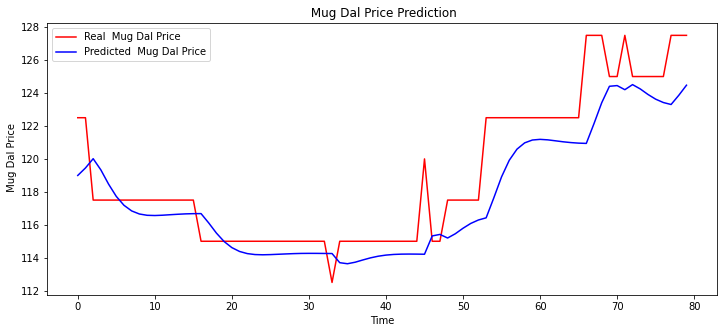

In [151]:
plt.plot(original, color = 'red', label = 'Real  Mug Dal Price')
plt.plot(pred, color = 'blue', label = 'Predicted  Mug Dal Price')
plt.title(' Mug Dal Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Mug Dal Price')
plt.legend()
plt.show()

In [152]:
mean_absolute_error(original, pred)

1.5979441642761252

In [153]:
mean_squared_error(original, pred)

4.5125964570506785

In [154]:
rmse(pred, original)

2.1242872821373946